<a href="https://colab.research.google.com/github/jfgf11/Examen-2-Machine/blob/master/examen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Examen 2




In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install pyEDFlib

     |████████████████████████████████| 1.1MB 5.1MB/s 
  Created wheel for pyEDFlib: filename=pyEDFlib-0.1.15-cp36-cp36m-linux_x86_64.whl size=920123 sha256=1c53aef86682889fb7e7a987853c8699759d5170922a0ae62905dd8170a4c2b9
  Stored in directory: /root/.cache/pip/wheels/57/e3/8e/ce6236e9ada08b8ff91ef922c7418dbd66f1182dfbb22f8579
Successfully built pyEDFlib


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import pandas as pd
import pyedflib as pyedf
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import AdaBoostClassifier

#Clases

In [0]:
#Esta no esta terminada.
class Resultados:
    def __init__(self, p_y_pred, p_y_true):#, p_labels):
        self.y_pred = p_y_pred
        self.y_true = p_y_true
        #self.labels = p_labels

    def darMatrizConfusion(self):
      cm = confusion_matrix(self.y_pred, self.y_true)#, self.labels)
      ax = plt.subplot()
      sns.heatmap(cm, annot = True, ax = ax); #annot=True to annotate cells
 
      # labels, title and ticks
      ax.set_xlabel('Predicted labels');
      ax.set_ylabel('True labels'); 
      ax.set_title('Confusion Matrix'); 
      ax.xaxis.set_ticklabels(['Clase0', 'Clase1', 'Clase2']);
      ax.yaxis.set_ticklabels(['Clase0', 'Clase1', 'Clase2']);

#Lectura de los Datos

In [14]:
filenameDatos = "drive/My Drive/sleep-cassette"
filenameDescripcion = "drive/My Drive/SC-subjects.xls"

ArchivoLightsOff=pd.read_excel(filenameDescripcion, sheet_name='Blad1')

TiempoLightsOff=ArchivoLightsOff["LightsOff"].values
TiempoLightsOffSegundos=TiempoLightsOff
HorasSuenio=8

for i in range (0, len(TiempoLightsOff)):
  segundos=int(TiempoLightsOff[i].hour) * 3600 + int(TiempoLightsOff[i].minute) * 60
  TiempoLightsOffSegundos[i]=segundos

listaArchivos = os.listdir(filenameDatos)

listaHypnograms = [i for i in listaArchivos if "Hypnogram" in i] 
listaPSGs = [i for i in listaArchivos if "PSG" in i]

listaHypnograms.sort()
listaPSGs.sort()

print("Importando datos...")

for i in range(0,1):#len(listaHypnograms)):

  hyp = listaHypnograms[i]
  psg = listaPSGs[i]

  fileHyp = pyedf.EdfReader(filenameDatos + "/" + hyp)
  filePSG = pyedf.EdfReader(filenameDatos + "/" + psg)

  hypTime, hypDur, hypEtiqueta = fileHyp.readAnnotations()

  tiempoComienzo = fileHyp.starttime_hour*3600+fileHyp.starttime_minute*60+fileHyp.starttime_second
  offset=TiempoLightsOffSegundos[i]-tiempoComienzo
  if offset<0:
    offset+=24*3600
  LimiteSuperior=offset+HorasSuenio*3600
  ventana=30
  tiempo=offset
  j=0
  referenciaSenial=0
  FrecuenciaMuestreo = filePSG.getSampleFrequency(referenciaSenial)
  Datos=np.zeros(3000)
  Etiquetas=[0]
  while tiempo<LimiteSuperior:
    if tiempo>hypTime[j]:
      j+=1
      
    ventanaMuestra = np.round(FrecuenciaMuestreo * ventana)
    muestraInicial = np.round(FrecuenciaMuestreo * tiempo)
    senial=filePSG.readSignal(referenciaSenial)
    senialActual=senial[muestraInicial:muestraInicial+ventanaMuestra]
    etiquetaActual=hypEtiqueta[j]
    Datos=np.vstack((Datos,senialActual))
    print((Datos).shape)
    Etiquetas=np.vstack((Etiquetas,etiquetaActual))
    tiempo+=ventana

  fileHyp._close() 
  filePSG._close()
#print(listaHypnograms)
#print(listaPSGs)

print("Termino.")

Importando datos...
(2, 3000)
(3, 3000)
(4, 3000)
(5, 3000)
(6, 3000)
(7, 3000)
(8, 3000)
(9, 3000)
(10, 3000)
(11, 3000)
(12, 3000)
(13, 3000)
(14, 3000)
(15, 3000)
(16, 3000)
(17, 3000)
(18, 3000)
(19, 3000)
(20, 3000)
(21, 3000)
(22, 3000)
(23, 3000)
(24, 3000)
(25, 3000)
(26, 3000)
(27, 3000)
(28, 3000)
(29, 3000)
(30, 3000)
(31, 3000)
(32, 3000)
(33, 3000)
(34, 3000)
(35, 3000)
(36, 3000)
(37, 3000)
(38, 3000)
(39, 3000)
(40, 3000)
(41, 3000)
(42, 3000)
(43, 3000)
(44, 3000)
(45, 3000)
(46, 3000)
(47, 3000)
(48, 3000)
(49, 3000)
(50, 3000)
(51, 3000)
(52, 3000)
(53, 3000)
(54, 3000)
(55, 3000)
(56, 3000)
(57, 3000)
(58, 3000)
(59, 3000)
(60, 3000)
(61, 3000)
(62, 3000)
(63, 3000)
(64, 3000)
(65, 3000)
(66, 3000)
(67, 3000)
(68, 3000)
(69, 3000)
(70, 3000)
(71, 3000)
(72, 3000)
(73, 3000)
(74, 3000)
(75, 3000)
(76, 3000)
(77, 3000)
(78, 3000)
(79, 3000)
(80, 3000)
(81, 3000)
(82, 3000)
(83, 3000)
(84, 3000)
(85, 3000)
(86, 3000)
(87, 3000)
(88, 3000)
(89, 3000)
(90, 3000)
(91, 3000

In [0]:
  fileHyp._close() 
  filePSG._close()
  

'Sleep stage 3'

In [0]:
Etiquetas

In [15]:
Etiquetas = Etiquetas[1:len(Etiquetas)]
for i in range(0, len(Etiquetas)):
  if Etiquetas[i]=="Sleep stage W":
    Etiquetas[i]=0
  if Etiquetas[i]=="Sleep stage 1":
    Etiquetas[i]=1
  if Etiquetas[i]=="Sleep stage 2":
    Etiquetas[i]=2
  if Etiquetas[i]=="Sleep stage 3":
    Etiquetas[i]=3
  if Etiquetas[i]=="Sleep stage 4":
    Etiquetas[i]=4
  if Etiquetas[i]=="Sleep stage R":
    Etiquetas[i]=5

unosEtiquetas=Etiquetas[Etiquetas != "Sleep stage ?"]
unosDatos = Datos[1:len(unosEtiquetas)+1]
print(len(unosEtiquetas))
print(len(unosDatos))

733
733


OSError: ignored

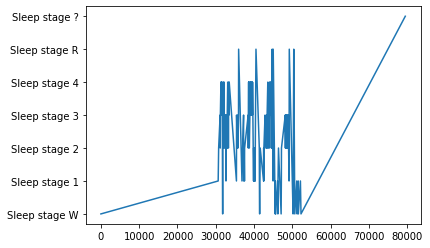

In [0]:
# Lectura del archivo de estados de sueño (etiquetas)
st_FileHypEdf = pyedf.EdfReader("SC4001EC-Hypnogram.edf")
print(st_FileHypEdf)

# Datos en ventanas de 30 segundos, 
#v_HypTime es el tiempo de inicio, v_HypDur es la duración en un estado específico (pueden ser varias ventanas),
# v_Hyp es la etiqueta.

v_HypTime, v_HypDur, v_Hyp = st_FileHypEdf.readAnnotations()

ptl.figure()
ptl.plot(v_HypTime, v_Hyp)

# Lectura de las señales s_SigNum señales con nombres v_Signal_Labels
st_FileEdf = pyedf.EdfReader("SC4001E0-PSG.edf")
print(st_FileEdf)
s_SigNum = st_FileEdf.signals_in_file
print(s_SigNum)
v_Signal_Labels = st_FileEdf.getSignalLabels()


# Conversion a segundos usando frecuencia de muestreo.
s_SigRef = 0
s_NSamples = st_FileEdf.getNSamples()[0]
s_FsHz = st_FileEdf.getSampleFrequency(s_SigRef)
print(s_NSamples)

# v_Sig = np.zeros((s_NSamples, 1))
v_Sig = st_FileEdf.readSignal(s_SigRef)
v_Time = np.arange(0, s_NSamples) / s_FsHz

s_WinSizeSec = 30
s_WinSizeSam = np.round(s_FsHz * s_WinSizeSec)


# plot de señales en ventanas de 30s
s_FirstInd = 0
ptl.figure()
while 1:
    s_LastInd = s_FirstInd + s_WinSizeSam
    if s_LastInd > s_NSamples:
        break

    ptl.plot(v_Time[s_FirstInd:s_LastInd], v_Sig[s_FirstInd:s_LastInd], linewidth=1)
    ptl.xlabel('Time (sec)')
    ptl.xlim(v_Time[s_FirstInd], v_Time[s_LastInd - 1])
    ptl.pause(0.5)

    s_FirstInd = s_LastInd

ptl.show()

In [0]:
print(st_FileHypEdf)
print(s_SigNum)


7


In [0]:
print(v_HypTime[-2])
print(v_Hyp[-2])

52260.0
Sleep stage W


#Entrenamiento del Modelo

#Implementación en Keras

In [0]:
def crearModelo():
#Ordenar estos parametros mejor. Quizas con un vector o algo asi para indicar cada capa de convolucion.
  numFiltros1 = 10
  tamFiltros1 = 5
  tamMaxPooling1 = 6
  numFiltros2 = 5
  tamFiltros2 = 5
  tamAveragePooling1 = 6
  numFiltros3 = 5
  tamFiltros3 = 5
  tamMaxPooling2 = 6

  #Numero de clases
  numClases = 6

  #Parametros del modelo
  tasa=0.001
  alpha = 0.001

  modelo = Sequential()

  #Esto corresponderia a la parte convolucional.
  modelo.add(Conv1D(numFiltros1, tamFiltros1, activation = 'relu', input_shape = (3000,1)))
  modelo.add(MaxPooling1D(tamMaxPooling1))
  modelo.add(Conv1D(numFiltros2, tamFiltros2, activation = 'relu'))
  modelo.add(AveragePooling1D(tamAveragePooling1))
  modelo.add(Conv1D(numFiltros3, tamFiltros3, activation = 'relu'))
  #modelo.add(GlobalAveragePooling1D())
  modelo.add(MaxPooling1D(tamMaxPooling2))
  modelo.add(Flatten())

  #Esto corresponderia a la parte de red neuronal normalita. (Puse cualquier cosa por ahora)
  modelo.add(Dense(25, activation = 'relu'))
  #modelo.add(Dropout(0.5))
  modelo.add(Dense(15, activation = 'relu'))#, activity_regularizer=l2(alpha)))
  modelo.add(Dense(5, activation = 'relu', activity_regularizer=l2(alpha)))
  modelo.add(Dense(numClases, activation = 'softmax'))

  sgd = optimizers.SGD(lr = tasa)
  adam = optimizers.Adam(learning_rate = tasa)

  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = adam, metrics = ['sparse_categorical_accuracy'])

  #modelo.summary()

  return modelo

modelo = crearModelo()

epocas = 100
batchSize = 32
hist = modelo.fit(x_train, y_train, verbose = 0, validation_data=(x_test, y_test), epochs = epocas, batch_size = batchSize)

graficarHistorias(hist)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(unosDatos, unosEtiquetas , random_state = 0, test_size=0.10)
x_train = np.expand_dims(x_train, axis=2) # reshape (569, 30) to (569, 30, 1) 
x_test = np.expand_dims(x_test, axis=2) # reshape (569, 30) to (569, 30, 1) 

In [88]:
#modelo = crearModelo()
epocas = 100
batchSize = 32
hist = modelo.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = epocas, batch_size = batchSize, verbose = 1)

#graficarHistoriaAccuracy(hist)
#graficarHistoriaValAccuracy(hist)
graficarHistorias(hist)

ValueError: ignored

#Implementación en AdaBoost

In [52]:
epocas = 100
batchSize = 32

#Esto no se por que esta fallando.
estimadorBase = KerasClassifier(build_fn = crearModelo, epochs = epocas, batch_size = batchSize, verbose = 0)

print("Calculando...")

numEstimadores = 3
adaBoost = AdaBoostClassifier(base_estimator = estimadorBase, n_estimators = numEstimadores) #Variar otros parametros como la tasa de aprendizaje
adaBoost.fit(x_train, y_train)

print(confusion_matrix(adaBoost.predict(x_train),y_train))
print(confusion_matrix(adaBoost.predict(x_test),y_test))

Calculando...


ValueError: ignored

#Resultados

In [0]:
def graficarHistoriaAccuracy(pHist):
  plt.plot(pHist.history['sparse_categorical_accuracy'], label = 'Accuracy Entrenamiento')
  plt.xlabel('Epoca')
  plt.ylabel('Accuracy Entrenamiento')
  plt.legend('Entrenamiento')
  plt.title("Accuracy de Entrenamiento vs Epoca")
  plt.legend()
  plt.show()

def graficarHistoriaValAccuracy(pHist):
  plt.plot(hist.history['val_sparse_categorical_accuracy'], label = 'Accuracy Validacion')
  plt.xlabel('Epoca')
  plt.ylabel('Accuracy Validacion')
  plt.legend('Validacion')
  plt.title("Accuracy de Validacion vs Epoca")
  plt.legend()
  plt.show()

def graficarHistorias(pHist):
  plt.plot(pHist.history['sparse_categorical_accuracy'], label = 'Accuracy Entrenamiento')
  plt.plot(hist.history['val_sparse_categorical_accuracy'], label = 'Accuracy Validacion')
  plt.xlabel('Epoca')
  plt.ylabel('Accuracy')
  plt.title("Accuracy vs Epoca")
  plt.legend()
  plt.show()

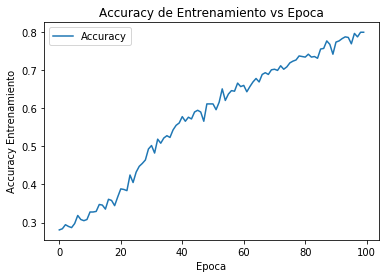

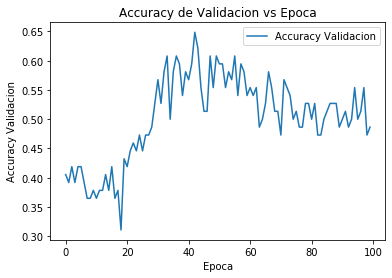

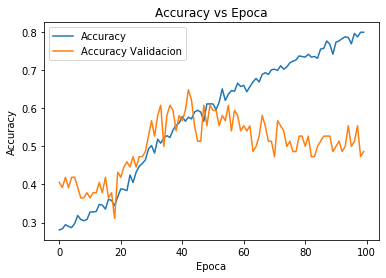

In [83]:

graficarHistoriaAccuracy(hist)
graficarHistoriaValAccuracy(hist)
graficarHistorias(hist)
